In [ ]:
import pandas as pd
import numpy as np
#from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Yüksek Lisans 2. Dönem/Kolektif Öğrenme/Proje3/instructions.csv')
data.head()

,Unnamed: 0,talimat,giriş,çıktı
0,0,Aşağıdaki bağlamda orijinal bir şey söyleyin:...,NaN,Ekibe katkıda bulunmaya başlamak ve bu alanda...
1,1,Aşağıdaki makale için bir başlık önerin: Bu m...,NaN,"""Dijital İletişimin Gücü: İnternet İş Ortamın..."
2,2,Şu konuyla ilgili 5 anahtar kelimeden oluşan ...,NaN,1. Karbon emisyonları 2. Yenilenebilir enerji...
3,3,Bu cümleyi pasiften aktife değiştirin: Yeni p...,NaN,Belediye başkanı yeni politikayı açıkladı.
4,4,Aşağıdaki fenomeni tanımlayan üç bilimsel teri...,NaN,"Yerçekimi kuvveti, Newton'un evrensel çekim y..."


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51563 entries, 0 to 51562
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  51563 non-null  int64 
 1   talimat     51563 non-null  object
 2    giriş      19088 non-null  object
 3    çıktı      51563 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
#giriş sütunu boş ve dolu olanlardan eşit miktarda seçilir.
data_with_nan = data[data[' giriş'].isnull()].iloc[0:1000]
data_without_nan = data[data[" giriş"].notnull()].iloc[0:1000]

In [ ]:
#Seçilen veriler birleştirilir.
df = pd.concat([data_with_nan,data_without_nan],ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2000 non-null   int64 
 1   talimat     2000 non-null   object
 2    giriş      1000 non-null   object
 3    çıktı      2000 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.6+ KB


In [ ]:
#talimat ve giriş sütunlarının birleştirildiği 'birleştirilmiş' sütunu oluşturulur.
data = df.copy()
data['birleştirilmiş'] = data.apply(
    lambda row: row['talimat'] if pd.isna(row[' giriş']) else row['talimat'] + ' ' + row[' giriş'], axis=1
)

In [ ]:
data.head()

,Unnamed: 0,talimat,giriş,çıktı,birleştirilmiş
0,0,Aşağıdaki bağlamda orijinal bir şey söyleyin:...,NaN,Ekibe katkıda bulunmaya başlamak ve bu alanda...,Aşağıdaki bağlamda orijinal bir şey söyleyin:...
1,1,Aşağıdaki makale için bir başlık önerin: Bu m...,NaN,"""Dijital İletişimin Gücü: İnternet İş Ortamın...",Aşağıdaki makale için bir başlık önerin: Bu m...
2,2,Şu konuyla ilgili 5 anahtar kelimeden oluşan ...,NaN,1. Karbon emisyonları 2. Yenilenebilir enerji...,Şu konuyla ilgili 5 anahtar kelimeden oluşan ...
3,3,Bu cümleyi pasiften aktife değiştirin: Yeni p...,NaN,Belediye başkanı yeni politikayı açıkladı.,Bu cümleyi pasiften aktife değiştirin: Yeni p...
4,4,Aşağıdaki fenomeni tanımlayan üç bilimsel teri...,NaN,"Yerçekimi kuvveti, Newton'un evrensel çekim y...",Aşağıdaki fenomeni tanımlayan üç bilimsel teri...


In [ ]:
#data kaydedilir.
data = data[["birleştirilmiş", " çıktı"]]
data.to_csv('/content/drive/MyDrive/Yüksek Lisans 2. Dönem/Kolektif Öğrenme/Proje3/veri_seti.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Yüksek Lisans 2. Dönem/Kolektif Öğrenme/Proje3/veri_seti.csv')
df.head()

,birleştirilmiş,çıktı
0,Aşağıdaki bağlamda orijinal bir şey söyleyin:...,Ekibe katkıda bulunmaya başlamak ve bu alanda...
1,Aşağıdaki makale için bir başlık önerin: Bu m...,"""Dijital İletişimin Gücü: İnternet İş Ortamın..."
2,Şu konuyla ilgili 5 anahtar kelimeden oluşan ...,1. Karbon emisyonları 2. Yenilenebilir enerji...
3,Bu cümleyi pasiften aktife değiştirin: Yeni p...,Belediye başkanı yeni politikayı açıkladı.
4,Aşağıdaki fenomeni tanımlayan üç bilimsel teri...,"Yerçekimi kuvveti, Newton'un evrensel çekim y..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   birleştirilmiş  2000 non-null   object
 1    çıktı          2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [ ]:
queries = df["birleştirilmiş"].tolist()
answers = df[" çıktı"].tolist()

In [ ]:
#Temsil Yöntemleri Tanımlama
sentence_transformers_models = {
    "all-MiniLM-L12-v2": SentenceTransformer("sentence-transformers/all-MiniLM-L12-v2"),
    "multilingual-e5-large-instruct": SentenceTransformer("intfloat/multilingual-e5-large-instruct"),
    "gte-large": SentenceTransformer("thenlper/gte-large"),
    "colbert": SentenceTransformer("bert-base-uncased"), #yanlış isim tanımlaması bert modeli kullanılmıştır.
    "jina-embeddings-v3": SentenceTransformer("jinaai/jina-embeddings-v3", trust_remote_code=True)
}

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/140k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/670M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/464 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/734k [00:00<?, ?B/s]

custom_st.py:   0%|          | 0.00/8.78k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/jina-embeddings-v3:
- custom_st.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

configuration_xlm_roberta.py:   0%|          | 0.00/6.54k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- configuration_xlm_roberta.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_lora.py:   0%|          | 0.00/15.4k [00:00<?, ?B/s]

modeling_xlm_roberta.py:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

embedding.py:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- embedding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


mlp.py:   0%|          | 0.00/7.62k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mlp.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


xlm_padding.py:   0%|          | 0.00/10.0k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- xlm_padding.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


block.py:   0%|          | 0.00/17.8k [00:00<?, ?B/s]

mha.py:   0%|          | 0.00/34.4k [00:00<?, ?B/s]

rotary.py:   0%|          | 0.00/24.5k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- mha.py
- rotary.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


stochastic_depth.py:   0%|          | 0.00/3.76k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- block.py
- mha.py
- stochastic_depth.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was downloaded from https://huggingface.co/jinaai/xlm-roberta-flash-implementation:
- modeling_xlm_roberta.py
- embedding.py
- mlp.py
- xlm_padding.py
- block.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
A new version of the following files was down

model.safetensors:   0%|          | 0.00/1.14G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/192 [00:00<?, ?B/s]

In [ ]:
# 3. Temsil Yöntemi ile Embedding Oluşturma
def create_embeddings(texts, model):
    return model.encode(texts, batch_size=32, show_progress_bar=True)

In [ ]:
# 5. Temsil Yöntemi için Embedding Hesapla ve Kaydet

for representation_name, representation_model in sentence_transformers_models.items():
    print(f"\nTemsil yöntemi: {representation_name}")

    # Sorgular ve Cevaplar için Embedding Oluşturma
    query_embeddings = create_embeddings(queries, representation_model)
    answer_embeddings = create_embeddings(answers, representation_model)

    # Embedding'leri Kaydetme
    np.save(f"/content/drive/MyDrive/Yüksek Lisans 2. Dönem/Kolektif Öğrenme/Proje3/temsiller/{representation_name}_queries.npy", query_embeddings)
    np.save(f"/content/drive/MyDrive/Yüksek Lisans 2. Dönem/Kolektif Öğrenme/Proje3/temsiller/{representation_name}_answers.npy", answer_embeddings)

    print(f"Embedding'ler ve sonuçlar {representation_name} için kaydedildi!")


Temsil yöntemi: all-MiniLM-L12-v2


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Embedding'ler ve sonuçlar all-MiniLM-L12-v2 için kaydedildi!

Temsil yöntemi: multilingual-e5-large-instruct


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Embedding'ler ve sonuçlar multilingual-e5-large-instruct için kaydedildi!

Temsil yöntemi: gte-large


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Embedding'ler ve sonuçlar gte-large için kaydedildi!

Temsil yöntemi: colbert


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Embedding'ler ve sonuçlar colbert için kaydedildi!

Temsil yöntemi: jina-embeddings-v3


Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Batches:   0%|          | 0/63 [00:00<?, ?it/s]

Embedding'ler ve sonuçlar jina-embeddings-v3 için kaydedildi!


In [ ]:
# Bireysel Embeding İçin Benzerlik Hesabı
representation_names = [
    "all-MiniLM-L12-v2",
    "multilingual-e5-large-instruct",
    "gte-large",
    "colbert",
    "jina-embeddings-v3"
]

embeding_similarity_matrices = []
for representation_name in representation_names:
    query_embeddings = np.load(f"/content/drive/MyDrive/Yüksek Lisans 2. Dönem/Kolektif Öğrenme/Proje3/temsiller/{representation_name}_queries.npy")
    answer_embeddings = np.load(f"/content/drive/MyDrive/Yüksek Lisans 2. Dönem/Kolektif Öğrenme/Proje3/temsiller/{representation_name}_answers.npy")
    similarity_matrix = cosine_similarity(query_embeddings, answer_embeddings)
    embeding_similarity_matrices.append(similarity_matrix)

In [ ]:
# Ensemble Yöntemleri
def ensemble_average(similarity_matrices):
    return np.mean(similarity_matrices, axis=0)

def ensemble_max_voting(similarity_matrices):
    return np.max(similarity_matrices, axis=0)

def ensemble_weighted_average(similarity_matrices, weights):
    weighted_matrices = [matrix * weight for matrix, weight in zip(similarity_matrices, weights)]
    return np.sum(weighted_matrices, axis=0) / np.sum(weights)

In [ ]:
#Top1 ve Top5 Hesaplama
def compute_top_k_from_matrix(similarity_matrix, answers, k=5):
    top1_results = []
    top5_results = []
    for query_idx in range(similarity_matrix.shape[0]):
        # En yüksek skora göre sıralama
        top_indices = np.argsort(similarity_matrix[query_idx])[::-1]
        top1_results.append(answers[top_indices[0]])
        top5_results.append([answers[i] for i in top_indices[:k]])
    return top1_results, top5_results

In [ ]:
#Doğruluk Hesabı
def calculate_accuracy(top1_results, top5_results, ground_truths):
    top1_correct = 0
    top5_correct = 0
    total = len(ground_truths)

    for i in range(total):
        if top1_results[i] == ground_truths[i]:
            top1_correct += 1
        if ground_truths[i] in top5_results[i]:
            top5_correct += 1

    top1_accuracy = top1_correct / total
    top5_accuracy = top5_correct / total
    return top1_accuracy, top5_accuracy

In [ ]:
#Bireysel Performans Hesabı
individual_model_results = {}

for representation_name, similarity_matrix in zip(representation_names, embeding_similarity_matrices):
    print(f"\nPerformans analizi: {representation_name}")

    # Top1 ve Top5 Sonuçlarını Hesapla
    top1_results, top5_results = compute_top_k_from_matrix(similarity_matrix, answers)

    # Doğruluk Oranlarını Hesapla
    top1_accuracy, top5_accuracy = calculate_accuracy(top1_results, top5_results, answers)
    individual_model_results[representation_name] = {
        "top1_accuracy": top1_accuracy,
        "top5_accuracy": top5_accuracy
    }

    # Performans Sonuçlarını Yazdır
    print(f"Top1 Accuracy: {top1_accuracy:.4f}")
    print(f"Top5 Accuracy: {top5_accuracy:.4f}")

    # Sonuçları CSV Dosyasına Kaydet
    pd.DataFrame({
        "Query": queries,
        "Ground Truth": answers,
        "Top1_Result": top1_results,
        "Top5_Results": ["; ".join(top5) for top5 in top5_results]
    }).to_csv(f"/content/drive/MyDrive/Yüksek Lisans 2. Dönem/Kolektif Öğrenme/Proje3/sonuclar/{representation_name}_results.csv", index=False)



Performans analizi: all-MiniLM-L12-v2
Top1 Accuracy: 0.3250
Top5 Accuracy: 0.4360

Performans analizi: multilingual-e5-large-instruct
Top1 Accuracy: 0.6720
Top5 Accuracy: 0.8215

Performans analizi: gte-large
Top1 Accuracy: 0.4150
Top5 Accuracy: 0.5575

Performans analizi: colbert
Top1 Accuracy: 0.0465
Top5 Accuracy: 0.0740

Performans analizi: jina-embeddings-v3
Top1 Accuracy: 0.8675
Top5 Accuracy: 0.9375


In [ ]:
#Performans Analizi
performance_df = pd.DataFrame(individual_model_results).T
performance_df.reset_index(inplace=True)
performance_df.columns = ["Model", "Top1 Accuracy", "Top5 Accuracy"]
melted_df = performance_df.melt(id_vars="Model", var_name="Metric", value_name="Accuracy")
melted_df

,Model,Metric,Accuracy
0,all-MiniLM-L12-v2,Top1 Accuracy,0.3250
1,multilingual-e5-large-instruct,Top1 Accuracy,0.6720
2,gte-large,Top1 Accuracy,0.4150
3,colbert,Top1 Accuracy,0.0465
4,jina-embeddings-v3,Top1 Accuracy,0.8675
5,all-MiniLM-L12-v2,Top5 Accuracy,0.4360
6,multilingual-e5-large-instruct,Top5 Accuracy,0.8215
7,gte-large,Top5 Accuracy,0.5575
8,colbert,Top5 Accuracy,0.0740
9,jina-embeddings-v3,Top5 Accuracy,0.9375


In [ ]:
#Grafikte doğru isimle göstermek için değişiklik yapıldı.
melted_df['Model'] = melted_df['Model'].replace('colbert', 'bert-base-turkish-uncased')
melted_df

,Model,Metric,Accuracy
0,all-MiniLM-L12-v2,Top1 Accuracy,0.3250
1,multilingual-e5-large-instruct,Top1 Accuracy,0.6720
2,gte-large,Top1 Accuracy,0.4150
3,bert-base-turkish-uncased,Top1 Accuracy,0.0465
4,jina-embeddings-v3,Top1 Accuracy,0.8675
5,all-MiniLM-L12-v2,Top5 Accuracy,0.4360
6,multilingual-e5-large-instruct,Top5 Accuracy,0.8215
7,gte-large,Top5 Accuracy,0.5575
8,bert-base-turkish-uncased,Top5 Accuracy,0.0740
9,jina-embeddings-v3,Top5 Accuracy,0.9375


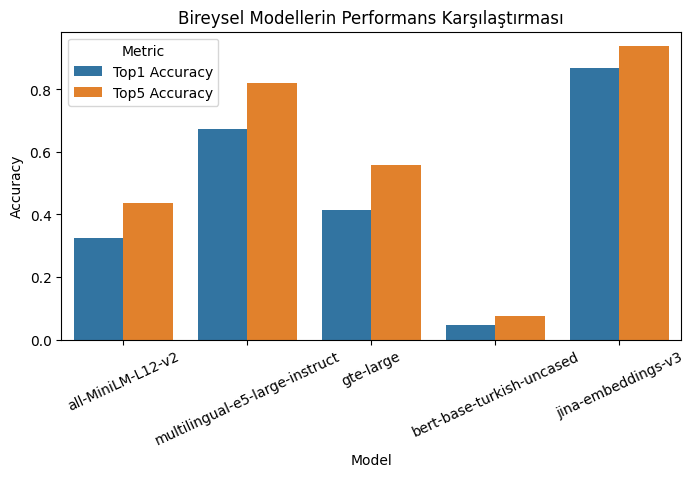

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(data=melted_df, x="Model", y="Accuracy", hue="Metric");
plt.xticks(rotation=25)
plt.title("Bireysel Modellerin Performans Karşılaştırması")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#Ensemble
weights = [1, 10, 1, 1, 10]
#weights = [1, 2, 1, 1, 2] Top1 Accuracy: 0.7865 Top5 Accuracy: 0.8920
#weights = [1, 2, 1, 2, 1] #Top1 Accuracy: 0.6960 Top5 Accuracy: 0.8040
#Ensemble Skorları ve Matrisler Üzerinde Performans
ensemble_similarity_matrices = {
    "average": ensemble_average(embeding_similarity_matrices),
    "weighted": ensemble_weighted_average(embeding_similarity_matrices, weights),
    "max_voting": ensemble_max_voting(embeding_similarity_matrices),
}

# Ensemble matrisi üzerinden Top1 ve Top5 hesaplama
ensemble_results = {}
for method_name, similarity_matrix in ensemble_similarity_matrices.items():
    top1_results, top5_results = compute_top_k_from_matrix(similarity_matrix, answers)
    ensemble_results[method_name] = {"top1": top1_results, "top5": top5_results}

In [ ]:
# Ensemble başarı hesaplama
ensemble_results = {}
for method_name, similarity_matrix in ensemble_similarity_matrices.items():
    # Ensemble matrisinden Top1 ve Top5 sonuçlarını hesapla
    top1_results, top5_results = compute_top_k_from_matrix(similarity_matrix, answers)

    # Top1 ve Top5 doğruluk oranlarını hesapla
    top1_accuracy, top5_accuracy = calculate_accuracy(top1_results, top5_results, answers)

    # Sonuçları sakla
    ensemble_results[method_name] = {
        "top1_accuracy": top1_accuracy,
        "top5_accuracy": top5_accuracy
    }

    # Sonuçları yazdır
    print(f"\nEnsemble Yöntemi: {method_name}")
    print(f"Top1 Accuracy: {top1_accuracy:.4f}")
    print(f"Top5 Accuracy: {top5_accuracy:.4f}")


Ensemble Yöntemi: average
Top1 Accuracy: 0.7300
Top5 Accuracy: 0.8360

Ensemble Yöntemi: weighted
Top1 Accuracy: 0.8545
Top5 Accuracy: 0.9360

Ensemble Yöntemi: max_voting
Top1 Accuracy: 0.1300
Top5 Accuracy: 0.1815


In [ ]:
data_ensemble_results = pd.DataFrame(ensemble_results).reset_index()
ensemble_melted = data_ensemble_results.melt(id_vars="index",var_name="Method", value_name="Accuracy")
ensemble_melted

,index,Method,Accuracy
0,top1_accuracy,average,0.7300
1,top5_accuracy,average,0.8360
2,top1_accuracy,weighted,0.8545
3,top5_accuracy,weighted,0.9360
4,top1_accuracy,max_voting,0.1300
5,top5_accuracy,max_voting,0.1815


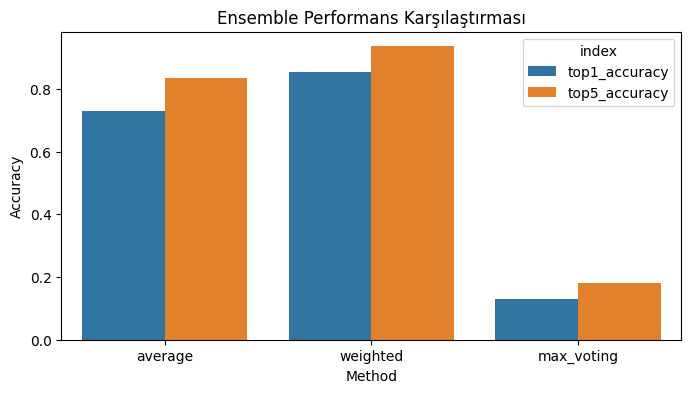

In [ ]:
plt.figure(figsize=(8,4))
sns.barplot(data=ensemble_melted, x="Method", y="Accuracy", hue="index");
plt.title("Ensemble Performans Karşılaştırması")
plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.show()